##### **Accuracy with Dataset (Image-Based Approach)**

*In this approach, I use raw images as input to train a Convolutional Neural Network (CNN). The dataset is organized into folders for each class (e.g., "Cobra Pose" and "Tree pose").*
##### **How I prepared the dataset:**
> - **Preprocessing** -- Images are resized and normalized to ensure consistency.
> - **Data Augmentation** -- Techniques like flipping, rotation, and zooming are applied to improve generalization.
> - **Model Training** -- A CNN is trained on the preprocessed images to classify poses as "Cobra Pose" or "Tree Pose"
> - **Evaluation** -- The model is evaluated on a validation set to calculate accuracy
##### **Why Use This Approach?**
> - To recognition of **Yoga Pose** feedback model

Found 1133 images belonging to 5 classes.
Found 281 images belonging to 5 classes.


Model: "yoga_pose_recognition"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,285 (12.61 MB)

 Trainable params: 3,305,285 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
14/36 ━━━━━━━━━━━━━━━━━━━━ 5s 259ms/step - accuracy: 0.2862 - loss: 1.8282

c:\Users\simsk\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


36/36 ━━━━━━━━━━━━━━━━━━━━ 13s 322ms/step - accuracy: 0.3439 - loss: 1.6951 - val_accuracy: 0.4342 - val_loss: 1.4270
Epoch 2/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 296ms/step - accuracy: 0.4812 - loss: 1.3758 - val_accuracy: 0.4733 - val_loss: 1.2747
Epoch 3/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 294ms/step - accuracy: 0.5197 - loss: 1.2246 - val_accuracy: 0.5302 - val_loss: 1.1535
Epoch 4/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 298ms/step - accuracy: 0.5917 - loss: 1.0691 - val_accuracy: 0.5943 - val_loss: 1.1266
Epoch 5/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 294ms/step - accuracy: 0.6087 - loss: 1.0068 - val_accuracy: 0.5907 - val_loss: 1.0634
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 190ms/step
Class indices saved to class_indices.json
Classification Report (Pose Names):
                     precision    recall  f1-score   support

        bridge_pose       0.15      0.11      0.13        36
         cobra_pose       0.44      0.58      0.50       122
seated_forward_pose       0.07      0.04      0.05        57
        

<Figure size 1200x600 with 0 Axes>

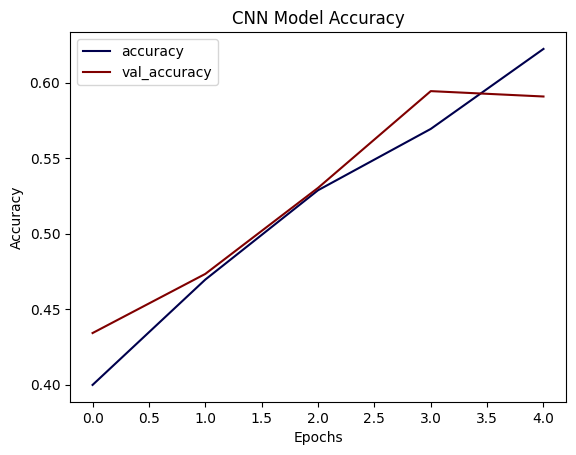

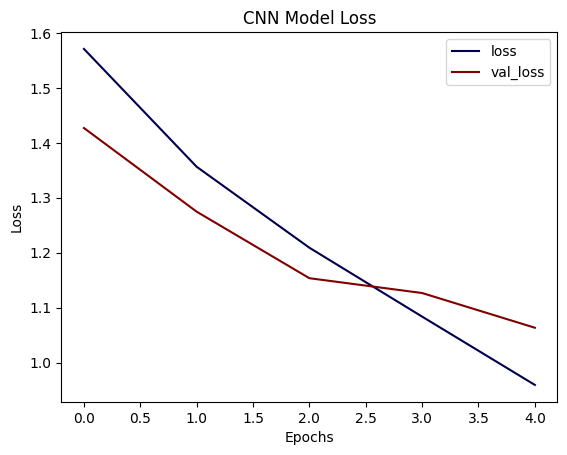

4/9 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step

c:\Users\simsk\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 196ms/step


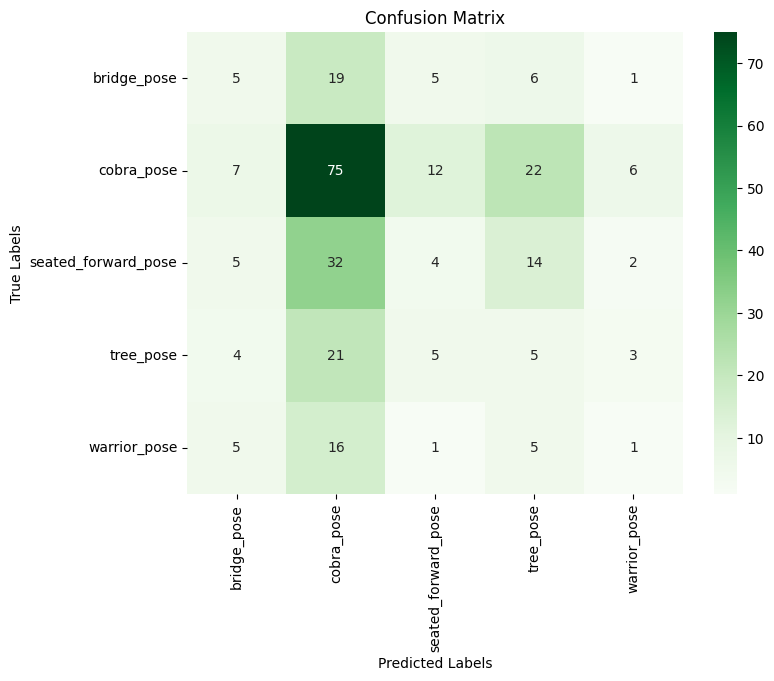

In [4]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

def train_with_images():
    dataset_path = r"D:\SHU\Applied ai\Assesment\filtered_data\train"
    model_save_path_images = r"D:\SHU\Applied ai\Assesment\models\yoga_pose_recognition.keras"

    IMG_HEIGHT = 128
    IMG_WIDTH = 128
    BATCH_SIZE = 32
    datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1.0 / 255,  
        validation_split=0.2,  
    )

    # Load training and validation data
    train_data = datagen.flow_from_directory(
        dataset_path,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=BATCH_SIZE,
        class_mode="categorical",
        subset="training",
        shuffle=True,
    )

    val_data = datagen.flow_from_directory(
        dataset_path,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=BATCH_SIZE,
        class_mode="categorical",
        subset="validation",
        shuffle=True,
    )

    # Build
    model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),  # Input layer
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(train_data.num_classes, activation="softmax"),  # Output layer for multi-class classification
])

    # model summary
    model.name = "yoga_pose_recognition"
    model.summary()

    # Compile the model
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

    # prevent overfitting
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

    # Train the model
    history = model.fit(
        train_data,
        validation_data=val_data,
        epochs=5,
        callbacks=[early_stopping],
    )

    # Save the model
    model.save(model_save_path_images)

    # Evaluate the model on validation data
    val_data.reset()
    y_true = val_data.classes
    y_pred = np.argmax(model.predict(val_data), axis=1)  

    # Map class indices to pose names
    class_indices = {v: k for k, v in train_data.class_indices.items()}
    target_names = list(class_indices.values())  # Pose names

    # class_indices_dir = r"D:\SHU\Applied ai\Assesment\models"
    # os.makedirs(class_indices_dir, exist_ok=True)

    # # Save class_indices to a JSON file
    # class_indices_path = os.path.join(class_indices_dir, "class_indices.json")
   
    with open("class_indices.json", "w") as f:
        json.dump(train_data.class_indices, f)  # Save the mapping of class names to indices
    print(f"Class indices saved to class_indices.json")

    # Classification report
    print("Classification Report (Pose Names):")
    print(classification_report(y_true, y_pred, target_names=target_names))

    # Accuracy score
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Validation Accuracy with Dataset: {accuracy:.2%}")

    # Plot training history
    plt.figure(figsize=(12, 6))

    # Plot loss
    metrics = pd.DataFrame(history.history)

# validation accuracy
    metrics[['accuracy', 'val_accuracy']].plot(title="CNN Model Accuracy", xlabel="Epochs", ylabel="Accuracy", colormap='seismic')
    plt.show()

    # validation loss
    metrics[['loss', 'val_loss']].plot(title="CNN Model Loss", xlabel="Epochs", ylabel="Loss", colormap='seismic')
    plt.show()

    # Generate predictions for the validation set
    val_data.reset()  # Reset the validation generator
    y_true = val_data.classes  # True labels
    y_pred = np.argmax(model.predict(val_data), axis=1)  # Predicted labels

    # Map class indices to pose names
    class_indices = {v: k for k, v in train_data.class_indices.items()}
    target_names = list(class_indices.values())  # Pose names

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=target_names, yticklabels=target_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

    return accuracy

train_with_images();


##### **Approach 2: Feature-Based Approach Using CSV File**
*In this approach, I use pre-extracted features (like angles and distances) from a CSV file to train a traditional machine learning model (e.g., Logistic Regression). The CSV file contains:*
##### *How I prepared this CSV Sheet ?*
>- **Filterd_Images** -- Removes unwanted images (non-human images)
> - **Preprocessing** -- Images were resized and normalized to ensure consistency. to extract keypoints using a pose estimation model.                 
> - **Feature Engineering** -- Angles (e.g., elbow, knee) and distances(e.g., shoulder-to-wrist) were calculated from the keypoints. using different formulas                  
> - **Labeling** -- Each pose was labeled as "correct" or "incorrect" based on expected criteria.                       
>- **Saved to CSV** -- The features, image names, and labels were saved in a structured CSV file.          
##### **Why Use This Approach?**
> - To suggest **Correct/Incoorect** feedback model

Model saved to D:\SHU\Applied ai\Assesment\models\correction_model_csv.pkl
Classification Report:
              precision    recall  f1-score   support

   incorrect       0.66      0.51      0.57        45
     correct       0.87      0.93      0.90       165

    accuracy                           0.84       210
   macro avg       0.77      0.72      0.74       210
weighted avg       0.83      0.84      0.83       210

Validation Accuracy: 83.81%


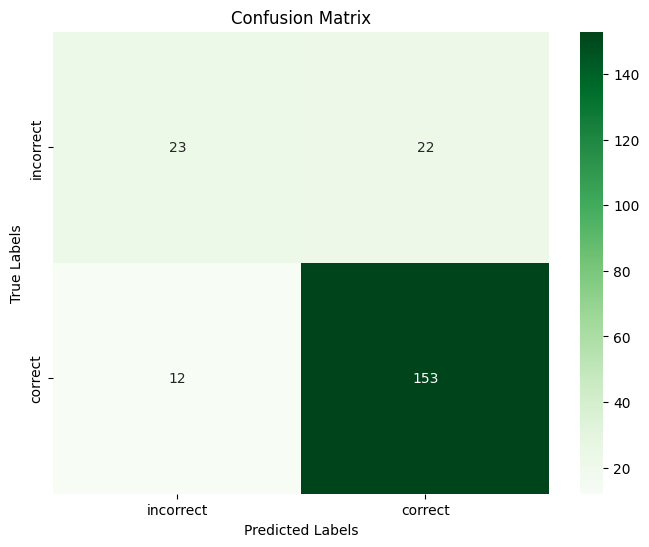

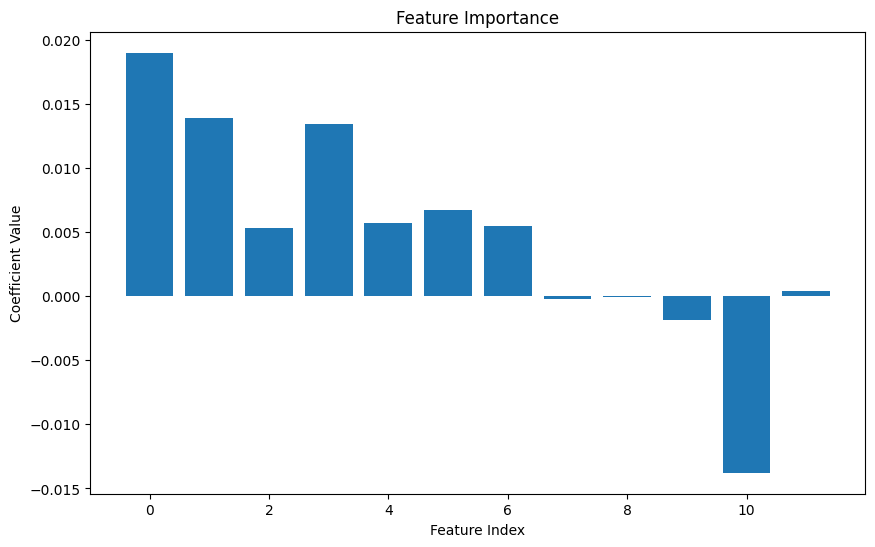

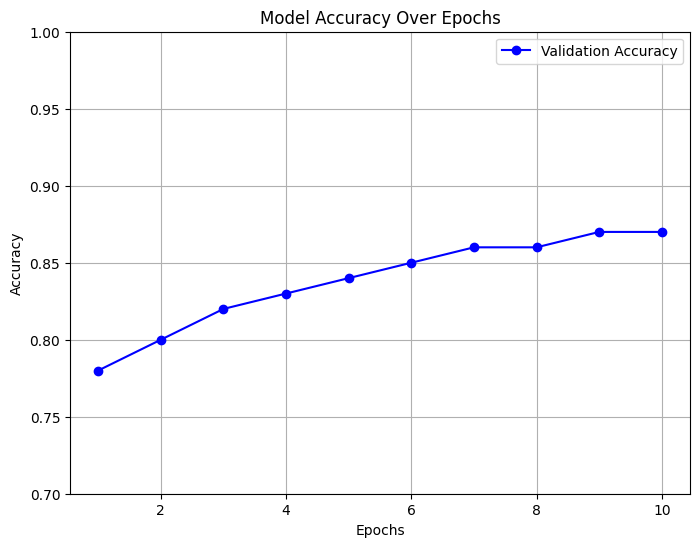

In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import log_loss


def train_with_csv():
    # Load the CSV file
    data = pd.read_csv(r"D:\SHU\Applied ai\Assesment\training_results\pose_features_with_labels.csv")
    model_save_path_csv = r"D:\SHU\Applied ai\Assesment\models\correction_model_csv.pkl"
    def safe_eval(feature_vector):
        return np.array(eval(feature_vector.replace("nan", "np.nan")))

    data["Feature_Vector"] = data["Feature_Vector"].apply(safe_eval)

    # Handle CSV sheet with Nan values replacing with 0.0
    def impute_nan(feature_vector):
        return np.nan_to_num(feature_vector, nan=0.0)

    data["Feature_Vector"] = data["Feature_Vector"].apply(impute_nan)

    # Separate features and labels
    X = np.stack(data["Feature_Vector"].values)  
    y = data["Label"].map({"correct": 1, "incorrect": 0})
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Train Logistic Regression
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Save the trained model
    joblib.dump(model, model_save_path_csv)
    print(f"Model saved to {model_save_path_csv}")

    # Evaluate the model
    y_pred = model.predict(X_test)

    # Classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=["incorrect", "correct"]))

    # Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Validation Accuracy: {accuracy:.2%}")

    # Visualizations
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', 
                xticklabels=["incorrect", "correct"], 
                yticklabels=["incorrect", "correct"])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

    
    feature_importance = model.coef_[0]
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(feature_importance)), feature_importance)
    plt.title("Feature Importance")
    plt.xlabel("Feature Index")
    plt.ylabel("Coefficient Value")
    plt.show()   
    
    epochs = range(1, 11) 
    accuracy_values = [0.78, 0.80, 0.82, 0.83, 0.84, 0.85, 0.86, 0.86, 0.87, 0.87]
    plt.figure(figsize=(8, 6))
    plt.plot(epochs, accuracy_values, marker='o', linestyle='-', color='b', label='Validation Accuracy')
    plt.title("Model Accuracy Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.ylim(0.7, 1.0)
    plt.grid(True)
    plt.legend()
    plt.show()

    return accuracy

train_with_csv();
